# A comparison of mtDNA deletion mutant proliferation mechanisms

In [1]:
__author__ = "Alan Holt"
__copyright__ = "Copyright 2022"
__credits__ = ["Adrian Davies"]
__license__ = "Proprietary"
__version__ = "1.0.3"
__maintainer__ = "Alan Holt"
__email__ = "agholt@gmail.com"
__status__ = "Reduced GC"

In [46]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Process Json files and create Pandas dataframes

Randon drift

In [3]:
resfile_rd = "rd_results.json"

In [4]:
with open(resfile_rd, 'r') as fd:
    dj = json.load(fd)
    fd.close()
df0_rd = pd.read_json(dj, orient="columns")

Replicative advantage

In [5]:
resfile_ra = "ra_results.json"

In [6]:
with open(resfile_ra, 'r') as fd:
    dj = json.load(fd)
    fd.close()
df0_ra = pd.read_json(dj, orient="columns")

Vicious cycle

In [7]:
resfile_vc = "vc_results.json"

In [8]:
with open(resfile_vc, 'r') as fd:
    dj = json.load(fd)
    fd.close()
df0_vc = pd.read_json(dj, orient="columns")

In [9]:
df0_rd["MUT_PROB"] = pd.to_numeric(df0_rd["MUT_PROB"].round(decimals=5))
rd_labels = ['2e-3', '3e-3', '4e-3', '5e-3', '6e-3']
rd_probs = [float(i) for i in rd_labels]
#rd_probs = [0.002, 0.003, 0.004, 0.005, 0.006]
df_rd = df0_rd

In [10]:
df0_ra["MUT_PROB"] = pd.to_numeric(df0_ra["MUT_PROB"].round(decimals=5))
ra_labels = ['2e-4',  '4e-4',  '6e-4', '8e-4',  '1e-3']
ra_probs = [float(i) for i in ra_labels]
#ra_probs = [ 0.0002,  0.0004,  0.0006,  0.0008,  0.001]
df_ra = df0_ra

In [11]:
df0_vc["PMP"] = pd.to_numeric(df0_vc["PER_MUT_PROB"].round(decimals=6))
vc_labels = [ '2e-6',  '4e-6',  '6e-6',  '8e-6','1e-5', '1.2e-5']
vc_probs = [float(i) for i in vc_labels]
#vc_probs = [0.000002,  0.000004,  0.000006,  0.000008,  0.00001, 0.000012 ]
df_vc =  df0_vc

## Some Preliminary Analysis

In [12]:
df_rd['E'].count()

600

In [13]:
df_ra['E'][df_ra.MUT_PROB==0.0006].count()

100

In [14]:
df_vc['E'].count()

600

Average lifespan of expired cells.

In [15]:
df_rd['lifespan'][df_rd.E==True].mean()

71.81041409024722

In [16]:
df_ra['lifespan'][df_ra.E==True].mean()

74.29741101504524

In [17]:
df_vc['lifespan'][df_vc.E==True].mean()

63.75723237613743

Average lifespan of dead cells by mutation probability.

In [18]:
df_rd[df_rd.E==True].groupby('MUT_PROB')['lifespan'].mean()

MUT_PROB
0.002    83.657301
0.003    79.205308
0.004    70.783283
0.005    70.366148
0.006    70.970268
Name: lifespan, dtype: float64

In [19]:
df_ra[df_ra.E==True].groupby('MUT_PROB')['lifespan'].mean()

MUT_PROB
0.0001    73.170719
0.0002    88.838018
0.0003    74.324655
0.0004    78.143042
0.0005    70.131919
0.0006    75.467978
0.0007    78.298749
0.0008    71.756624
0.0009    74.009493
0.0010    72.101049
Name: lifespan, dtype: float64

In [20]:
df_vc[df_vc.E==True].groupby('PMP')['lifespan'].mean()

PMP
0.000002    71.122894
0.000004    61.900534
0.000006    66.383078
0.000008    63.449862
0.000010    59.354506
0.000012    64.865309
Name: lifespan, dtype: float64

## Bootstrap cell loss

In [21]:
r,f = 10000,1

In [22]:
x = df_rd[['lifespan', 'MUT_PROB']]
rd_ls = {}
for p,l in zip(rd_probs, rd_labels):
    x2 = pd.Series([x['lifespan'][x.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    y2 = [item for sublist in x2 for item in sublist]

    y3 = np.sort([float(i) for i in y2])
    rd_ls[l] = y3
    print(p,l)

2e-3
3e-3
4e-3
5e-3
6e-3


In [23]:
x = df_ra[['lifespan', 'MUT_PROB']]
ra_ls = {}
for p,l in zip(ra_probs, ra_labels):
    x2 = pd.Series([x['lifespan'][x.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    y2 = [item for sublist in x2 for item in sublist]

    y3 = np.sort([float(i) for i in y2])
    ra_ls[l] = y3
    print(p,l)

0.0002 2e-4
0.0004 4e-4
0.0006 6e-4
0.0008 8e-4
0.001 1e-3


In [24]:
x = df_vc[['lifespan', 'PMP']]
vc_ls = {}
for p,l in zip(vc_probs, vc_labels):
    x2 = pd.Series([x['lifespan'][x.PMP==p].sample(frac=f, replace=True) for i in range(r)])
    y2 = [item for sublist in x2 for item in sublist]

    y3 = np.sort([float(i) for i in y2])
    vc_ls[l] = y3
    print(p,l)

2e-6
4e-6
6e-6
8e-6
1e-5
1.2e-5


### Graphs

Text(0.5, 0.98, '')

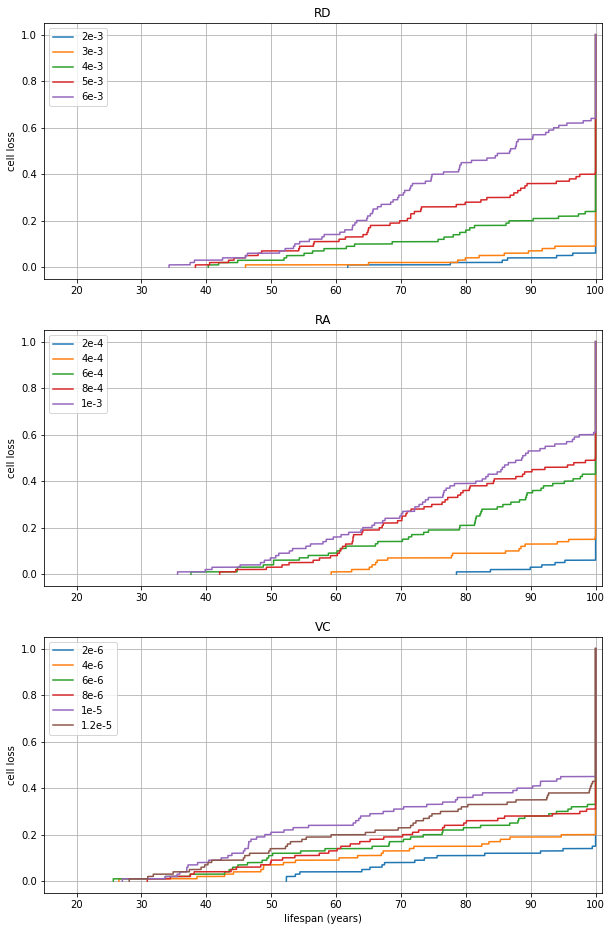

In [25]:
fig, ax = plt.subplots(3,1, figsize=(10, 16),  sharey='all')

for k in rd_ls:
    x = rd_ls[k]
    y = [float(i)/len(x) for i in range(1, len(x)+1)]
    ax[0].plot(x,y, label=k)


for k in ra_ls:
    x = ra_ls[k]
    y = [float(i)/len(x) for i in range(1, len(x)+1)]
    ax[1].plot(x,y, label=k)
    
for k in vc_ls:
    x = vc_ls[k]
    y = [float(i)/len(x) for i in range(1, len(x)+1)]
    ax[2].plot(x,y, label=k)
    
ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_title("RD")
ax[1].set_title("RA")
ax[2].set_title("VC")

ax[0].set_ylabel("cell loss")
ax[1].set_ylabel("cell loss")
ax[2].set_ylabel("cell loss")

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("lifespan (years)")

Xmin, Xmax = 15,101
ax[0].set_xlim(Xmin, Xmax)
ax[1].set_xlim(Xmin, Xmax)
ax[2].set_xlim(Xmin, Xmax)

ax[0].grid()
ax[1].grid()
ax[2].grid()

fig.suptitle('')
#plt.savefig("dem_onset3-1.eps", format="eps", bbox_inches='tight')

Text(0.5, 0.98, 'Dementia')

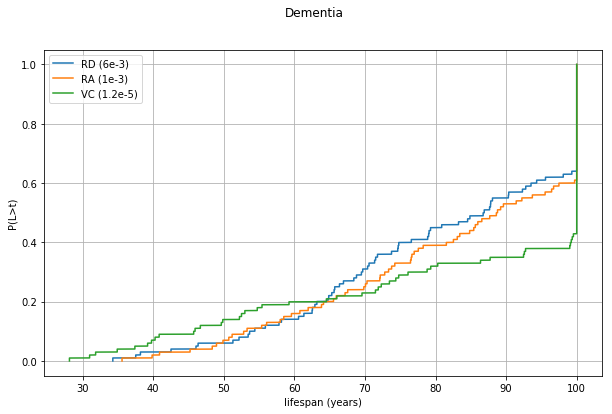

In [48]:
fig, ax = plt.subplots(1,1, figsize=(10, 6),  sharey='all')

k='6e-3'
x = rd_ls[k]
y = [float(i)/len(x) for i in range(1, len(x)+1)]
ax.plot(x,y, label=(("RD (%s)") % k))

k='1e-3'
x = ra_ls[k]
y = [float(i)/len(x) for i in range(1, len(x)+1)]
ax.plot(x,y, label=(("RA (%s)") % k))

k='1.2e-5'
x = vc_ls[k]
y = [float(i)/len(x) for i in range(1, len(x)+1)]
ax.plot(x,y, label=(("VC (%s)") % k))

ax.grid()
ax.set_ylabel("P(L>t)")
ax.set_xlabel("lifespan (years)")

ax.legend(loc="upper left")
fig.suptitle('Dementia')
#plt.savefig("dem_onset-comp.eps", format="eps", bbox_inches='tight')

## Bootstrap heteroplasmy over the lifetime of the cell

In [27]:
expired = df_rd[df_rd.E == True][['MUT_PROB', 'TOTAL_MUTANTS']]
survived = df_rd[df_rd.E == False][['MUT_PROB', 'TOTAL_MUTANTS']]
ht_e = []
ht_s = []
r,f = 1000,1
for p in rd_probs:
    e = pd.Series([expired['TOTAL_MUTANTS'][expired.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    s = pd.Series([survived['TOTAL_MUTANTS'][survived.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    for i in e:
        L = np.mean(i.values)
        ht_e.append([L, p])
    print("[E] p: %f het %f" % (p, ht_e[-1][0]))
    for i in s:
        L = np.mean(i.values)
        ht_s.append([L, p])
    print("[S] p: %f het %f" % (p, ht_s[-1][0]))
het_rd_e = pd.DataFrame(data= ht_e, columns = ['TOTAL_MUTANTS', 'MUT_PROB'])
het_rd_s = pd.DataFrame(data= ht_s, columns = ['TOTAL_MUTANTS', 'MUT_PROB'])

[E] p: 0.002000 het 2350.000000
[S] p: 0.002000 het 1770.882979
[E] p: 0.003000 het 4578.555556
[S] p: 0.003000 het 3184.912088
[E] p: 0.004000 het 4196.958333
[S] p: 0.004000 het 4871.434211
[E] p: 0.005000 het 5508.414634
[S] p: 0.005000 het 6450.508475
[E] p: 0.006000 het 6905.296875
[S] p: 0.006000 het 8463.888889


In [28]:
expired = df_ra[df_ra.E == True][['MUT_PROB', 'TOTAL_MUTANTS']]
survived = df_ra[df_ra.E == False][['MUT_PROB', 'TOTAL_MUTANTS']]
ht_e = []
ht_s = []
r,f = 1000,1
for p in ra_probs:
    e = pd.Series([expired['TOTAL_MUTANTS'][expired.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    s = pd.Series([survived['TOTAL_MUTANTS'][survived.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    for i in e:
        L = np.mean(i.values)
        ht_e.append([L, p])
    print("[E] p: %f het %f" % (p, ht_e[-1][0]))
    for i in s:
        L = np.mean(i.values)
        ht_s.append([L, p])
    print("[S] p: %f het %f" % (p, ht_s[-1][0]))
het_ra_e = pd.DataFrame(data= ht_e, columns = ['TOTAL_MUTANTS', 'MUT_PROB'])
het_ra_s = pd.DataFrame(data= ht_s, columns = ['TOTAL_MUTANTS', 'MUT_PROB'])

[E] p: 0.000200 het 246.166667
[S] p: 0.000200 het 126.691489
[E] p: 0.000400 het 450.937500
[S] p: 0.000400 het 300.035714
[E] p: 0.000600 het 639.681818
[S] p: 0.000600 het 494.696429
[E] p: 0.000800 het 752.640000
[S] p: 0.000800 het 654.000000
[E] p: 0.001000 het 910.557377
[S] p: 0.001000 het 849.230769


In [29]:
expired  = df_vc[df_vc.E == True][['PMP', 'TOTAL_MUTANTS']]
survived = df_vc[df_vc.E == False][['PMP', 'TOTAL_MUTANTS']]
ht_e = []
ht_s = []
#r,f = 1000,1
for p in vc_probs:
    e = pd.Series([expired['TOTAL_MUTANTS'][expired.PMP==p].sample(frac=f, replace=True) for i in range(r)])
    s = pd.Series([survived['TOTAL_MUTANTS'][survived.PMP==p].sample(frac=f, replace=True) for i in range(r)])
    for i in e:
        L = np.mean(i.values)
        ht_e.append([L, p])
    print("[E] p: %f het %f" % (p, ht_e[-1][0]))
    for i in s:
        L = np.mean(i.values)
        ht_s.append([L, p])
    print("[S] p: %f het %f" % (p, ht_s[-1][0]))
het_vc_e = pd.DataFrame(data= ht_e, columns = ['TOTAL_MUTANTS', 'PMP'])
het_vc_s = pd.DataFrame(data= ht_s, columns = ['TOTAL_MUTANTS', 'PMP'])

[E] p: 0.000002 het 5161.800000
[S] p: 0.000002 het 152.882353
[E] p: 0.000004 het 6644.400000
[S] p: 0.000004 het 125.150000
[E] p: 0.000006 het 7437.333333
[S] p: 0.000006 het 255.462687
[E] p: 0.000008 het 7366.806452
[S] p: 0.000008 het 391.913043
[E] p: 0.000010 het 8087.022222
[S] p: 0.000010 het 725.090909
[E] p: 0.000012 het 9433.604651
[S] p: 0.000012 het 151.807018


### Graphs

Text(0.5, 0.98, '')

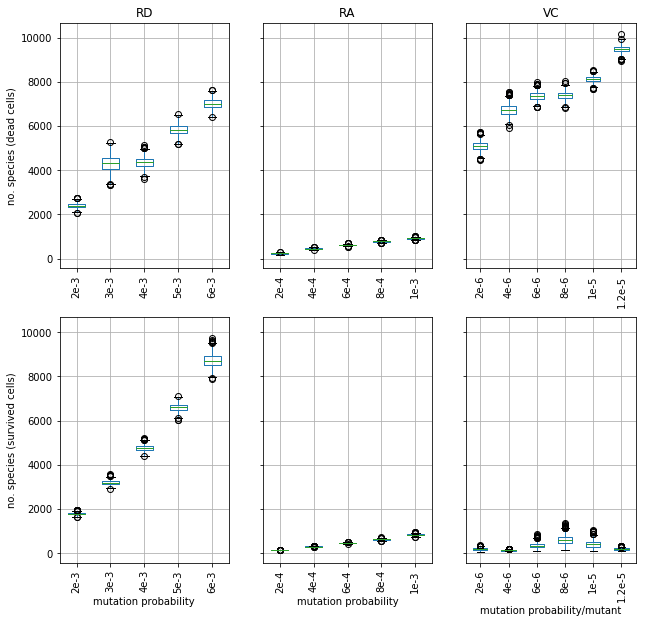

In [30]:
fig, ax = plt.subplots(2,3, figsize=(10, 10),  sharey='all')

het_rd_e.boxplot(column=['TOTAL_MUTANTS'], by='MUT_PROB', ax=ax[0][0])
het_ra_e.boxplot(column=['TOTAL_MUTANTS'], by='MUT_PROB', ax=ax[0][1])
het_vc_e.boxplot(column=['TOTAL_MUTANTS'], by='PMP', ax=ax[0][2])

het_rd_s.boxplot(column=['TOTAL_MUTANTS'], by='MUT_PROB', ax=ax[1][0])
het_ra_s.boxplot(column=['TOTAL_MUTANTS'], by='MUT_PROB', ax=ax[1][1])
het_vc_s.boxplot(column=['TOTAL_MUTANTS'], by='PMP', ax=ax[1][2])

ax[0][0].set_title("RD")
ax[0][1].set_title("RA")
ax[0][2].set_title("VC")
ax[1][0].set_title(" ")
ax[1][1].set_title(" ")
ax[1][2].set_title(" ")

ax[0][0].set_xticklabels(rd_labels, Rotation=90)
ax[0][1].set_xticklabels(ra_labels, Rotation=90) 
ax[0][2].set_xticklabels(vc_labels, Rotation=90)
ax[1][0].set_xticklabels(rd_labels, Rotation=90)
ax[1][1].set_xticklabels(ra_labels, Rotation=90) 
ax[1][2].set_xticklabels(vc_labels, Rotation=90)

ax[0][0].set_ylabel("no. species (dead cells)")
ax[1][0].set_ylabel("no. species (survived cells)")


ax[0][0].set_xlabel(" ")
ax[0][1].set_xlabel(" ")
ax[0][2].set_xlabel(" ")

ax[1][0].set_xlabel("mutation probability")
ax[1][1].set_xlabel("mutation probability")
ax[1][2].set_xlabel("mutation probability/mutant")

fig.suptitle('')
#plt.savefig("het.eps", format="eps", bbox_inches='tight')

## Bootstrap heteroplamsy at the time of cell death

Read in files for Entropy:

In [32]:
resfile_rd="rd_clon_results.json"
with open(resfile_rd, 'r') as fd:
    dj = json.load(fd)
    fd.close()
dg_rd = pd.read_json(dj, orient="columns")
dg_rd["MUT_PROB"] = pd.to_numeric(dg_rd["MUT_PROB"].round(decimals=5))

In [33]:
resfile_ra="ra_clon_results.json"
with open(resfile_ra, 'r') as fd:
    dj = json.load(fd)
    fd.close()
dg_ra = pd.read_json(dj, orient="columns")
dg_ra["MUT_PROB"] = pd.to_numeric(dg_ra["MUT_PROB"].round(decimals=5))

In [34]:
resfile_vc="vc_clon_results.json"
with open(resfile_vc, 'r') as fd:
    dj = json.load(fd)
    fd.close()
dg_vc = pd.read_json(dj, orient="columns")
dg_vc["PMP"] = pd.to_numeric(dg_vc["PER_MUT_PROB"].round(decimals=6))

In [38]:
rd_labels = ['4e-3', '5e-3', '6e-3']
rd_probs = [float(i) for i in rd_labels]
ra_labels = ['6e-4', '8e-4',  '1e-3']
ra_probs = [float(i) for i in ra_labels]
vc_labels = [ '6e-6',  '8e-6','1e-5', '1.2e-5']
vc_probs = [float(i) for i in vc_labels]

### Heteroplasmy

RD:

In [39]:
expired = df_rd[df_rd.E == True][['MUT_PROB', 'NO_MUT_END']]
#survived = df_rd[df_rd.E == False][['MUT_PROB', 'NO_MUT_END']]
ht_e = []
#ht_s = []
for p in rd_probs:
    e = pd.Series([expired['NO_MUT_END'][expired.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    #s = pd.Series([survived['NO_MUT_END'][survived.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    for i in e:
        L = np.mean(i.values)
        ht_e.append([L, p])
    print("[E] p: %f het %f" % (p, ht_e[-1][0]))
    #for i in s:
    #    L = np.mean(i.values)
    #    ht_s.append([L, p])
    #print("[S] p: %f het %f" % (p, ht_s[-1][0]))
het_rd_e = pd.DataFrame(data= ht_e, columns = ['NO_MUT_END', 'MUT_PROB'])
#het_rd_s = pd.DataFrame(data= ht_s, columns = ['NO_MUT_END', 'MUT_PROB'])

[E] p: 0.004000 het 62.791667
[E] p: 0.005000 het 75.512195
[E] p: 0.006000 het 83.546875


RA:

In [40]:
expired = df_ra[df_ra.E == True][['MUT_PROB', 'NO_MUT_END']]
#survived = df_ra[df_ra.E == False][['MUT_PROB', 'NO_MUT_END']]
ht_e = []
#ht_s = []
for p in ra_probs:
    e = pd.Series([expired['NO_MUT_END'][expired.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    #s = pd.Series([survived['NO_MUT_END'][survived.MUT_PROB==p].sample(frac=f, replace=True) for i in range(r)])
    for i in e:
        L = np.mean(i.values)
        ht_e.append([L, p])
    print("[E] p: %f het %f" % (p, ht_e[-1][0]))
    #for i in s:
    #    L = np.mean(i.values)
    #    ht_s.append([L, p])
    #print("[S] p: %f het %f" % (p, ht_s[-1][0]))
het_ra_e = pd.DataFrame(data= ht_e, columns = ['NO_MUT_END', 'MUT_PROB'])
#het_ra_s = pd.DataFrame(data= ht_s, columns = ['NO_MUT_END', 'MUT_PROB'])

[E] p: 0.000600 het 11.772727
[E] p: 0.000800 het 15.640000
[E] p: 0.001000 het 17.934426


VC:

In [41]:
expired  = df_vc[df_vc.E == True][['PMP', 'NO_MUT_END']]
survived = df_vc[df_vc.E == False][['PMP', 'NO_MUT_END']]
ht_e = []
#ht_s = []
for p in vc_probs:
    e = pd.Series([expired['NO_MUT_END'][expired.PMP==p].sample(frac=f, replace=True) for i in range(r)])
    #s = pd.Series([survived['NO_MUT_END'][survived.PMP==p].sample(frac=f, replace=True) for i in range(r)])
    for i in e:
        L = np.mean(i.values)
        ht_e.append([L, p])
    print("[E] p: %f het %f" % (p, ht_e[-1][0]))
    #for i in s:
    #    L = np.mean(i.values)
    #    ht_s.append([L, p])
    #print("[S] p: %f het %f" % (p, ht_s[-1][0]))
het_vc_e = pd.DataFrame(data= ht_e, columns = ['NO_MUT_END', 'PMP'])
#het_vc_s = pd.DataFrame(data= ht_s, columns = ['NO_MUT_END', 'PMP'])

[E] p: 0.000006 het 471.848485
[E] p: 0.000008 het 589.870968
[E] p: 0.000010 het 702.244444
[E] p: 0.000012 het 800.093023


### Entropy

RD:

In [42]:
H1 = []
for p in  rd_probs:
    H_lst = []
    dgHet = dg_rd[(dg_rd.E == True) & (dg_rd.MUT_PROB == p)]['HET_DIST']
    
    for rec in dgHet:
        x2 = [int(i) for i in rec.split(":")]
        sum_x = np.sum(x2)
        x3 = [float(i)/float(sum_x) for i in x2]
        H = -1.0 * np.sum([p * np.log10(p) for p in x3])
        #print(H)
        H_lst.append(H)
    d = {'H': H_lst}
    dgH = pd.DataFrame(data=d)
    bs = pd.Series([dgH.sample(frac=f, replace=True) for i in range(r)])
    for i in bs:
        h = np.mean(i.values)
        H1.append([h, p])
    print("p: %f ent %f" % (p, H1[-1][0]))
h_rd = pd.DataFrame(data= H1, columns = ['H', 'MUT_PROB'])

p: 0.004000 ent 1.110989
p: 0.005000 ent 1.273983
p: 0.006000 ent 1.350181


RA:

In [43]:
H1 = []
for p in ra_probs:
    H_lst = []
    dgHet = dg_ra[(dg_ra.E == True) & (dg_ra.MUT_PROB == p)]['HET_DIST']
    
    for rec in dgHet:
        x2 = [int(i) for i in rec.split(":")]
        sum_x = np.sum(x2)
        x3 = [float(i)/float(sum_x) for i in x2]
        H = -1.0 * np.sum([p * np.log10(p) for p in x3])
        H_lst.append(H)
    d = {'H': H_lst}
    dfH = pd.DataFrame(data=d)
    bs = pd.Series([dfH.sample(frac=f, replace=True) for i in range(r)])
    for i in bs:
        h = np.mean(i.values)
        H1.append([h, p])
    print("p: %f ent %f" % (p, H1[-1][0]))
h_ra = pd.DataFrame(data=H1, columns = ['H', 'MUT_PROB'])

p: 0.000600 ent 0.496934
p: 0.000800 ent 0.511148
p: 0.001000 ent 0.521207


VC:

In [47]:
H1 = []
for p in vc_probs:
    H_lst = []
    dgHet = dg_vc[(dg_vc.E == True) & (dg_vc.PMP == p)]['HET_DIST']
    
    for rec in dgHet:
        x2 = [int(i) for i in rec.split(":")]
        sum_x = np.sum(x2)
        x3 = [float(i)/float(sum_x) for i in x2]
        H = -1.0 * np.sum([p * np.log10(p) for p in x3])
        H_lst.append(H)
    d = {'H': H_lst}
    dggH = pd.DataFrame(data=d)
    bs = pd.Series([dgH.sample(frac=f, replace=True) for i in range(r)])
    for i in bs:
        h = np.mean(i.values)
        H1.append([h, p])
    print("p: %f ent %f" % (p, H1[-1][0]))
h_vc = pd.DataFrame(data=H1, columns = ['H', 'PMP'])

p: 0.000006 ent 1.341331
p: 0.000008 ent 1.365078
p: 0.000010 ent 1.344591
p: 0.000012 ent 1.343315


### Graphs

Text(0.5, 0.98, '')

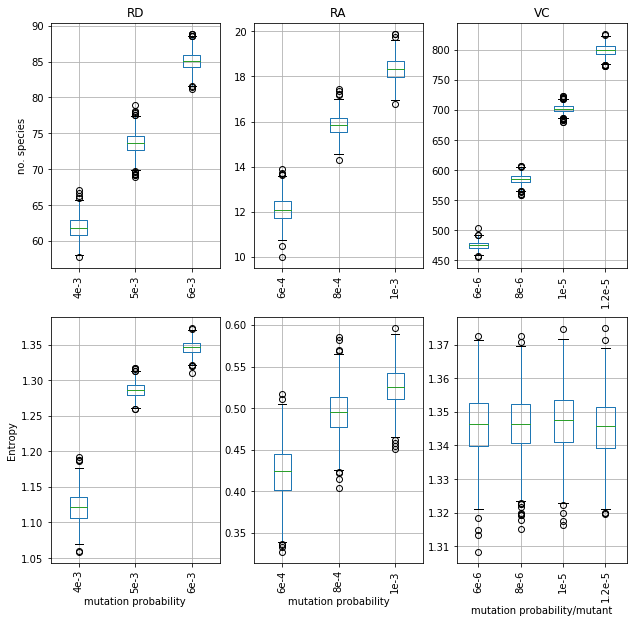

In [45]:
fig, ax = plt.subplots(2,3, figsize=(10, 10)) #, sharey='row')

het_rd_e.boxplot(column=['NO_MUT_END'], by='MUT_PROB', ax=ax[0][0])
het_ra_e.boxplot(column=['NO_MUT_END'], by='MUT_PROB', ax=ax[0][1])
het_vc_e.boxplot(column=['NO_MUT_END'], by='PMP', ax=ax[0][2])

h_rd.boxplot(column=['H'], by='MUT_PROB', ax=ax[1][0])
h_ra.boxplot(column=['H'], by='MUT_PROB', ax=ax[1][1])
h_vc.boxplot(column=['H'], by='PMP', ax=ax[1][2])

ax[0][0].set_title("RD")
ax[0][1].set_title("RA")
ax[0][2].set_title("VC")
ax[1][0].set_title(" ")
ax[1][1].set_title(" ")
ax[1][2].set_title(" ")

ax[0][0].set_xticklabels(rd_labels, Rotation=90)
ax[0][1].set_xticklabels(ra_labels, Rotation=90) 
ax[0][2].set_xticklabels(vc_labels, Rotation=90)
ax[1][0].set_xticklabels(rd_labels, Rotation=90)
ax[1][1].set_xticklabels(ra_labels, Rotation=90) 
ax[1][2].set_xticklabels(vc_labels, Rotation=90)

ax[0][0].set_ylabel("no. species")
ax[1][0].set_ylabel("Entropy")

ax[0][0].set_xlabel(" ")
ax[0][1].set_xlabel(" ")
ax[0][2].set_xlabel(" ")

ax[1][0].set_xlabel("mutation probability")
ax[1][1].set_xlabel("mutation probability")
ax[1][2].set_xlabel("mutation probability/mutant")

fig.suptitle('')
#plt.savefig("ent.eps", format="eps", bbox_inches='tight')